In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Salary_Data.csv")
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


- Independent Feature :YearsExperience
- Dependent Feature :Salary
- Supervised Learning Problem(Labelled data)
- Regression Problem,Dependent feature is countious Numerical

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

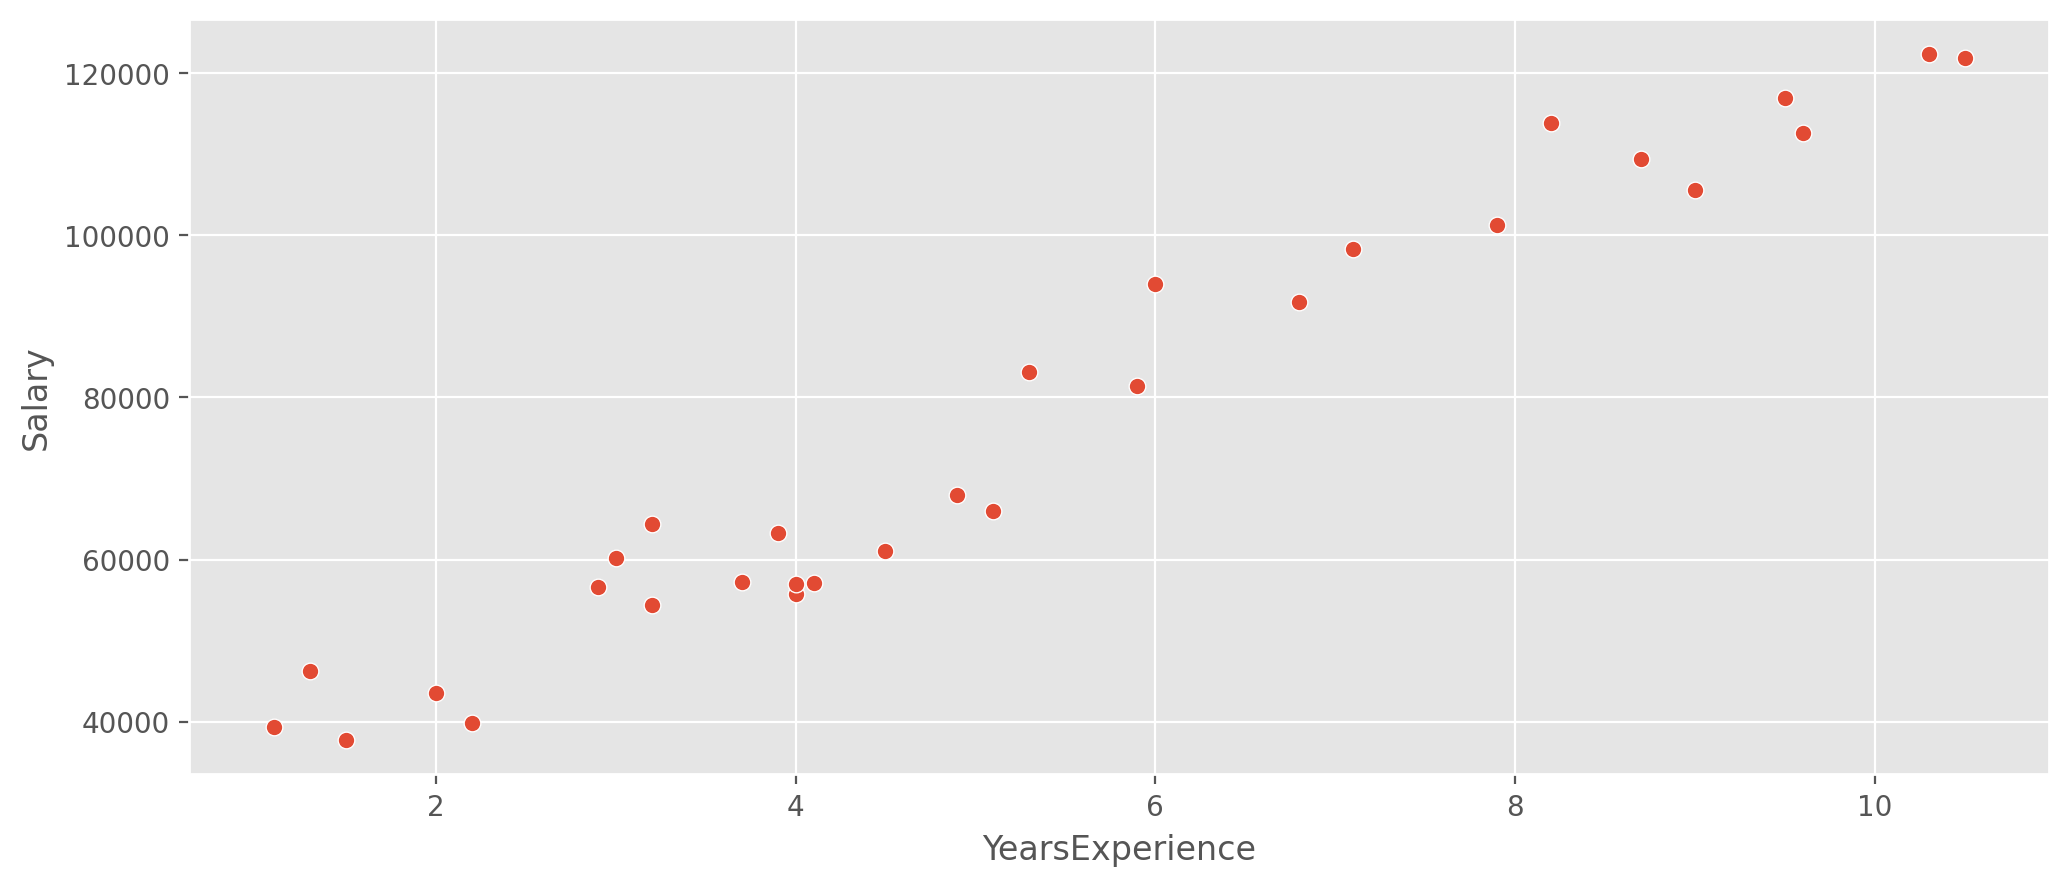

In [7]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('YearsExperience', 'Salary', data = df)


- only one'independent feature
- the nature of relationship between indeprndent  and dependent feature is 'linear'
- simple Linear Regression is the suitable algorithm
- in simple regression we fit function similar to straight linear to our data
- Y'=B0 + B1 * X :
- Y'-Predicted salary , X-Years  Experience
- The Goal is to learn best values of B0 and B1
- Two method:
            1.Ordinary Least Squares (OLS)
            2.Gradient Desecent

<AxesSubplot:xlabel='YearsExperience'>

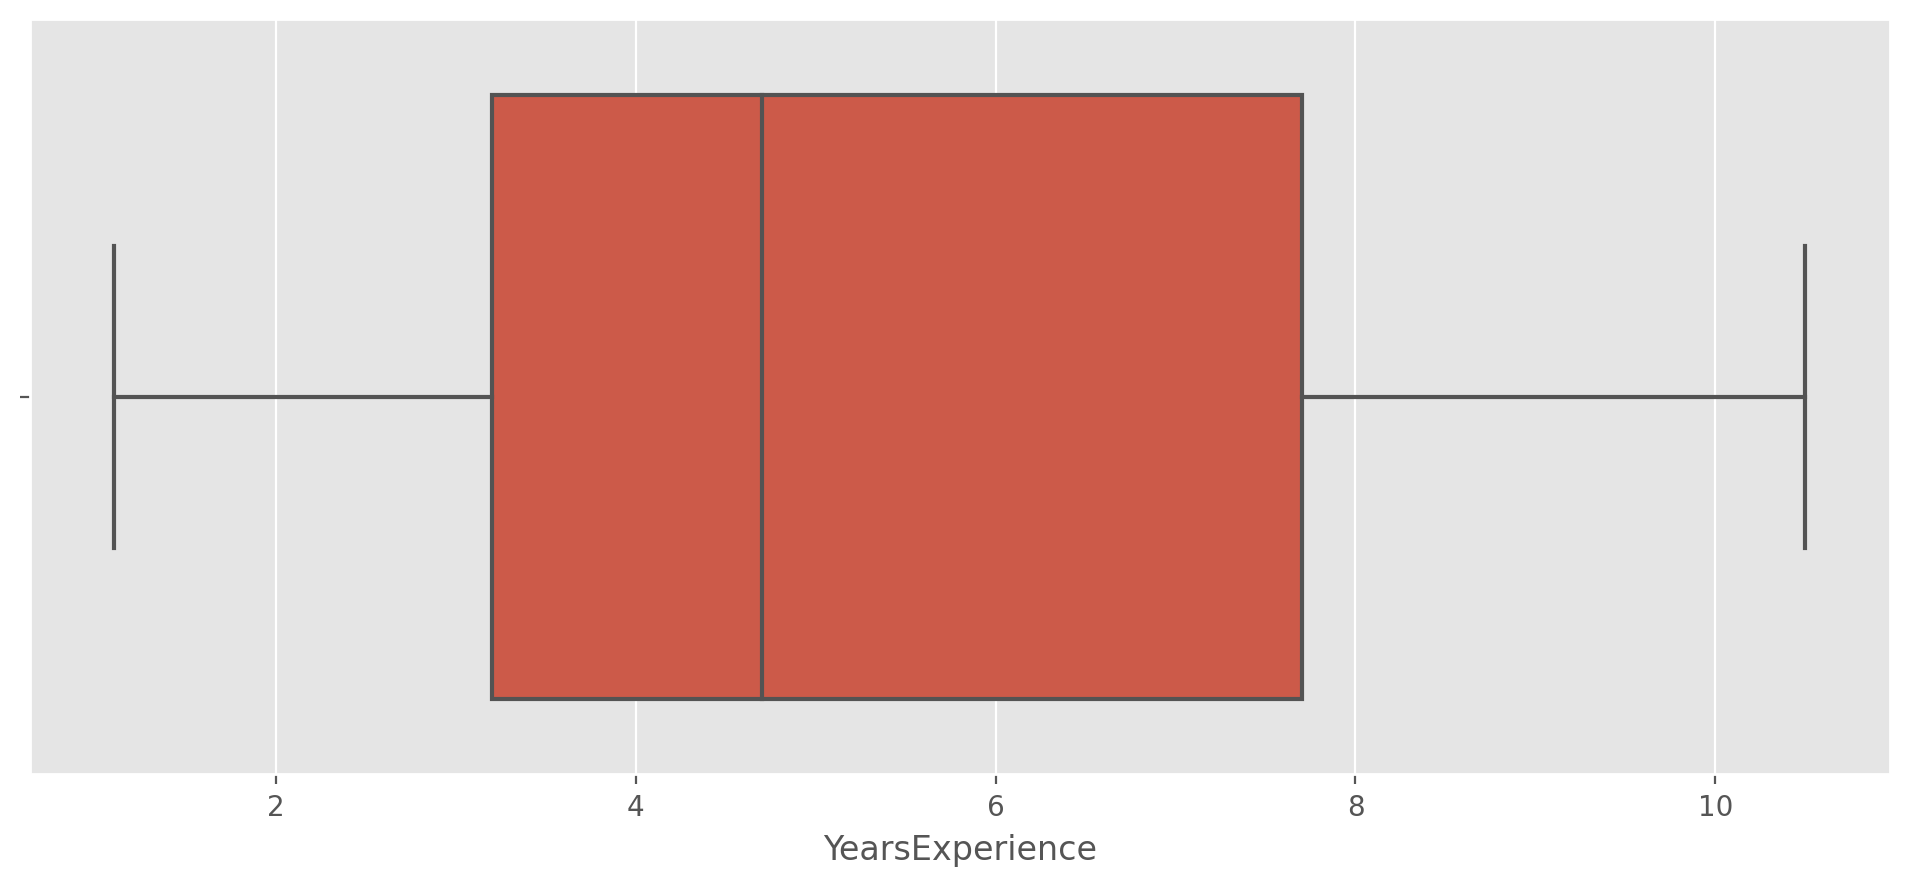

In [9]:
plt.figure(figsize = (12,5), dpi = 200)
sns.boxplot('YearsExperience', data = df)


<AxesSubplot:xlabel='Salary'>

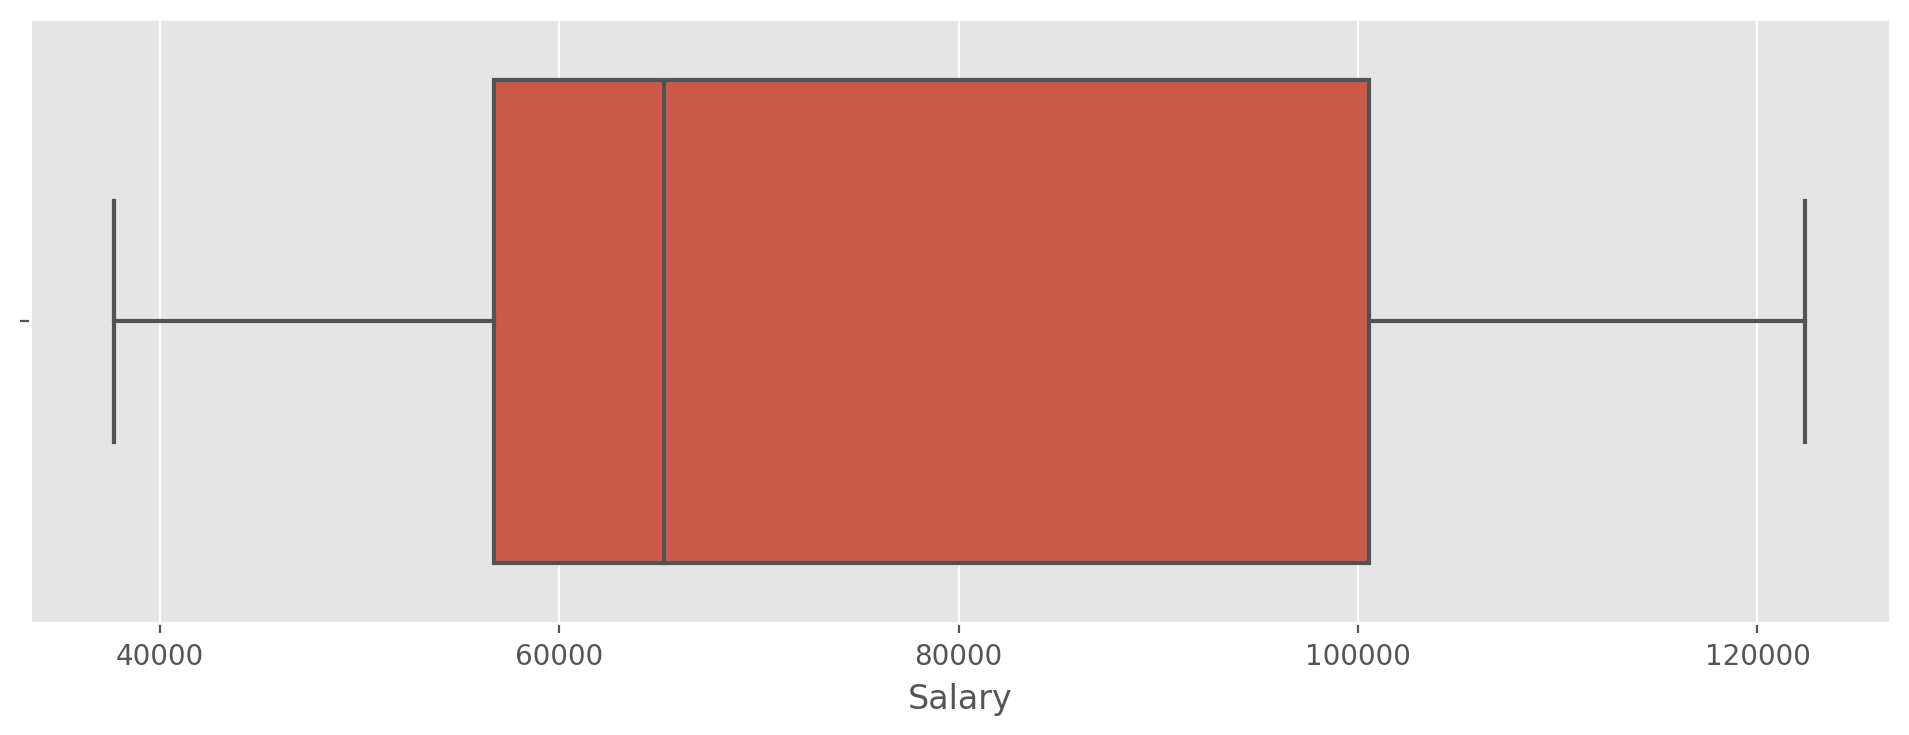

In [10]:
plt.figure(figsize = (12,4), dpi = 200)
sns.boxplot('Salary', data = df)


In [11]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [14]:
X= df[['YearsExperience']].values
Y= df[['Salary']].values


In [15]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [16]:
Y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872]], dtype=int64)

In [19]:
print("Independent feature shape  :",X.shape)
print("Dependent   feature shape : ",Y.shape)

Independent feature shape  : (30, 1)
Dependent   feature shape :  (30, 1)


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.3,random_state=5)

In [21]:
print("Training Data shape  :",x_train.shape)
print("Training Labels Shaple shape : ",y_train.shape)
print("Testing Data Shape :",x_test.shape)
print("Testing Labels Shape :",y_test.shape)

Training Data shape  : (21, 1)
Training Labels Shaple shape :  (21, 1)
Testing Data Shape : (9, 1)
Testing Labels Shape : (9, 1)


# Training /Fitting The Model

In [24]:
#OLS Method
from sklearn.linear_model import LinearRegression       #import the Class
regressor=LinearRegression()                             #Create an Object
regressor.fit(x_train,y_train)                          #fit the object

LinearRegression()

In [25]:
type(regressor)

sklearn.linear_model._base.LinearRegression

In [26]:
regressor.coef_                               #B1

array([[9298.06674988]])

In [27]:
regressor.intercept_                         #B0

array([27182.22562441])

## Y'=B0 + B1 * X
## Y'=27182.22562441 + 9298.06674988 * X
### Salary = 27182.22562441 + 9298.06674988 * YearsExperience

In [28]:
regressor.predict([[20]])

array([[213143.56062195]])

In [29]:
27182.22562441 + 9298.06674988 * 20

213143.56062201

In [30]:
regressor.score(x_test,y_test)

0.9624024983951907

In [31]:
pred_train=regressor.predict(x_train)
pred_test=regressor.predict(x_test)

from sklearn.metrics import r2_score
print('Training Data Score :',r2_score(y_train,pred_train))
print("Testing Data Score :",r2_score(y_test,pred_test))

Training Data Score : 0.9499163703220002
Testing Data Score : 0.9624024983951907


In [36]:
def predict_salary(year_of_exp):
    year_of_exp=np.array(year_of_exp).reshape(-1,1)    #-1 is used to actual size
    salary=regressor.predict(year_of_exp)
    print("The Estimated Salary for {} years of experience is : {}".format(year_of_exp[0][0],int(salary[0][0])))

In [37]:
predict_salary(20)

The Estimated Salary for 20 years of experience is : 213143


In [38]:
predict_salary(25)

The Estimated Salary for 25 years of experience is : 259633


# Vizualizing the Model Fit

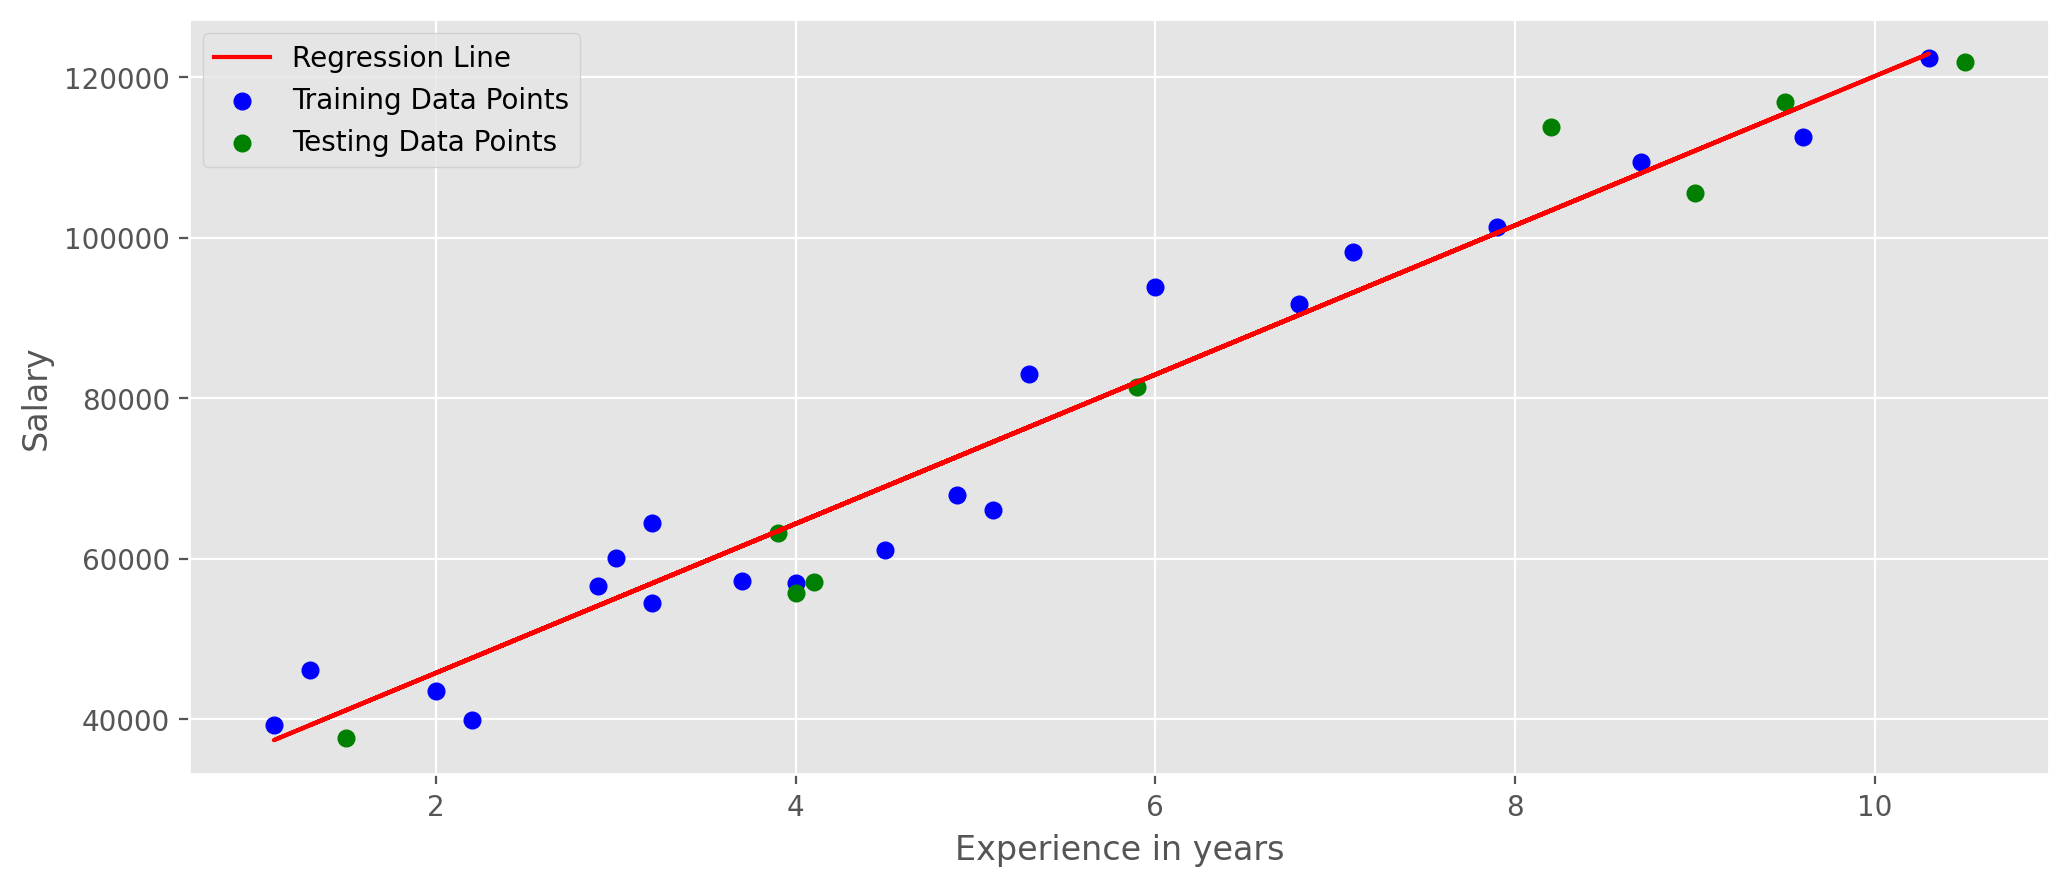

In [42]:
plt.figure(figsize=(12,5),dpi=200)
plt.scatter(x_train,y_train,color='blue',label='Training Data Points')
plt.scatter(x_test,y_test,color='green',label='Testing Data Points')
plt.plot(x_train,pred_train,color='Red',label='Regression Line')
plt.xlabel('Experience in years')
plt.ylabel('Salary')
plt.legend()

# ==========================================================

# Stochastic Graident Descent

In [44]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor()
sgd_reg.fit(x_train,x_train)

SGDRegressor()

In [45]:
sgd_reg.coef_

array([0.9772474])

In [46]:
sgd_reg.intercept_

array([0.13729346])

In [47]:
pred_train=regressor.predict(x_train)
pred_test=regressor.predict(x_test)

from sklearn.metrics import r2_score
print('Training Data Score :',r2_score(y_train,pred_train))
print("Testing Data Score :",r2_score(y_test,pred_test))

Training Data Score : 0.9499163703220002
Testing Data Score : 0.9624024983951907


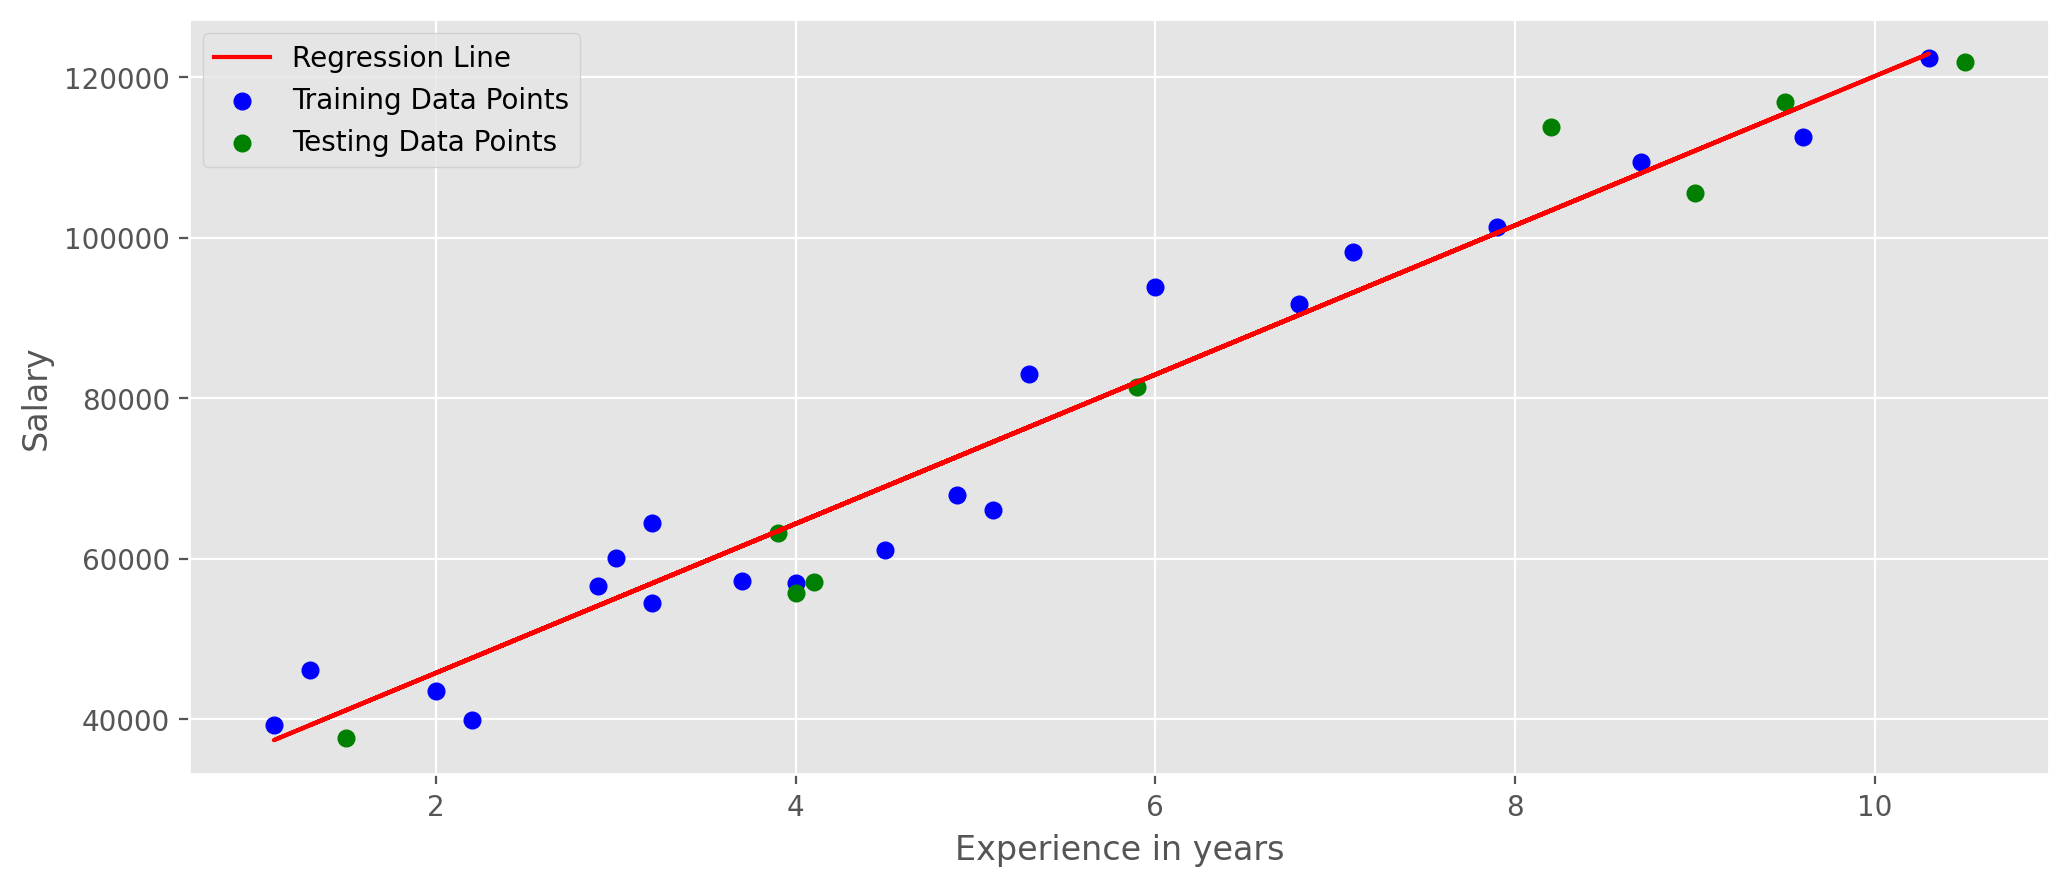

In [48]:
plt.figure(figsize=(12,5),dpi=200)
plt.scatter(x_train,y_train,color='blue',label='Training Data Points')
plt.scatter(x_test,y_test,color='green',label='Testing Data Points')
plt.plot(x_train,pred_train,color='Red',label='Regression Line')
plt.xlabel('Experience in years')
plt.ylabel('Salary')
plt.legend()